In [3]:
import os
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint as MCP, EarlyStopping as ES
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [5]:
#making a dir kaggle in the content folder
os.mkdir("/content/kaggle/")


In [6]:
#shifting data of kaggle.json into newly created  dir
copyfile("/content/kaggle.json","/content/kaggle/kaggle.json")

'/content/kaggle/kaggle.json'

In [7]:

!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [9]:
# Step 1: Upload your Kaggle API key
from google.colab import files
files.upload()   # Choose kaggle.json from your computer

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"taeeba","key":"600b5599ad73d0109709c30153f85655"}'}

In [10]:
# Step 2: Move kaggle.json to the right folder and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
# Step 3: Download the dataset using Kaggle API
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 87% 688M/788M [00:03<00:02, 46.4MB/s]
100% 788M/788M [00:03<00:00, 209MB/s] 


In [12]:
# Step 4: Unzip the dataset
!unzip microsoft-catsvsdogs-dataset.zip -d cats_vs_dogs

Streaming output truncated to the last 5000 lines.
  inflating: cats_vs_dogs/PetImages/Dog/550.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5500.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5501.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5502.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5503.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5504.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5505.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5506.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5507.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5508.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5509.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/551.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5510.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5511.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5512.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5513.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5514.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5515.jpg  
  inflating: cats_vs_dogs/PetImag

In [13]:
import zipfile as z
zp=z.ZipFile('/content/microsoft-catsvsdogs-dataset.zip')
zp.extractall()
zp.close()

In [14]:
#making directories for testing & training data
os.mkdir("/content/kaggle/Cats-vs-Dogs")    #Cats-vs-Dogs folder
os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/")   #Train folder
os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/")    #Test Folder
os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/Cats") # Cats Folder in Training data
os.mkdir("/content/kaggle/Cats-vs-Dogs/Train/Dogs")  # Dogs Folder in Training data
os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/Cats")    # Cats Folder in Testing data
os.mkdir("/content/kaggle/Cats-vs-Dogs/Test/Dogs")    # Dogs Folder in Testing data

In [15]:
#keeping track ofrequired dir
TRAIN='/content/kaggle/Cats-vs-Dogs/Train/'
TEST='/content/kaggle/Cats-vs-Dogs/Test/'

CAT_SOURCE='/content/PetImages/Cat/'
CAT_TRAIN='/content/kaggle/Cats-vs-Dogs/Train/Cats/'
CAT_TEST='/content/kaggle/Cats-vs-Dogs/Test/Cats/'

DOG_SOURCE='/content/PetImages/Dog/'
DOG_TRAIN='/content/kaggle/Cats-vs-Dogs/Train/Dogs/'
DOG_TEST='/content/kaggle/Cats-vs-Dogs/Test/Dogs/'

In [17]:
def data_spliting(SOURCE,TRAINING,TESTING,SPLIT_SIZE):
  file=[filename for filename in os.listdir(SOURCE) if os.path.getsize(SOURCE+filename)>0]
  train_size=int(len(file)*SPLIT_SIZE)
  test_size=  int(len(file)*(1-SPLIT_SIZE))
  shuffled_data=random.sample(file,len(file))
  train_data=shuffled_data[0:train_size]
  test_data=shuffled_data[train_size:]

#copying files into dir Train
  for files in train_data:
    copyfile(SOURCE+files, f"{TRAINING}cat-{files}")

#copying files into dir Test

  for files in test_data:
      copyfile(SOURCE+files, f"{TESTING}dog-{files}")

In [18]:
#spliting data of Cats & Dogs by data_spliting(SOURCE,TRAINING,TESTING,SPLIT_SIZE) function
data_spliting(CAT_SOURCE,CAT_TRAIN,CAT_TEST,0.8)
data_spliting(DOG_SOURCE,DOG_TRAIN,DOG_TEST,0.8)

In [19]:
#getting length /size of training data
print(f"There are {len(os.listdir(CAT_TRAIN))} images of cats in the training set")
print(f"There are {len(os.listdir(DOG_TRAIN))} images of dogs in the training set\n{'_'*50}")

#getting length /size of testing data
print(f"There are {len(os.listdir(CAT_TEST))} images of cats in the testing set")
print(f"There are {len(os.listdir(DOG_TEST))} images of dogs in the testing set\n{'_'*50}")
print(f"The space occupied by 'Dogs' dir in testing data is {os.path.getsize(DOG_TEST)} bytes")
print(f"The space occupied by 'Cats' dir in testing data is {os.path.getsize(CAT_TEST)} bytes\n{'_'*50}")

There are 10000 images of cats in the training set
There are 10000 images of dogs in the training set
__________________________________________________
There are 2500 images of cats in the testing set
There are 2500 images of dogs in the testing set
__________________________________________________
The space occupied by 'Dogs' dir in testing data is 73728 bytes
The space occupied by 'Cats' dir in testing data is 69632 bytes
__________________________________________________


In [22]:
# Using ImageDataGenerator from keras
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,        # normalize pixels [0,255] -> [0,1]
    shear_range=0.2,       # random shear
    zoom_range=0.2,        # random zoom
    horizontal_flip=True   # random horizontal flip
)


In [25]:
#Training data generator
train_set = datagen.flow_from_directory(
    directory=r"/content/kaggle/Cats-vs-Dogs/Train/",  # <-- Path to training images
    target_size=(256, 256),          # <-- Resize all images to 256x256
    batch_size=32,                   # <-- Common choice for batch size
    class_mode="binary"              # <-- Binary classification (cat vs dog)
)

Found 19998 images belonging to 2 classes.


In [28]:
# Testing data generator
test_set = datagen.flow_from_directory(
    directory=r"/content/kaggle/Cats-vs-Dogs/Test",   # <-- Path to testing images
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary"
)

Found 5000 images belonging to 2 classes.


In [29]:
#Type of test_set
type(test_set)

keras.src.legacy.preprocessing.image.DirectoryIterator

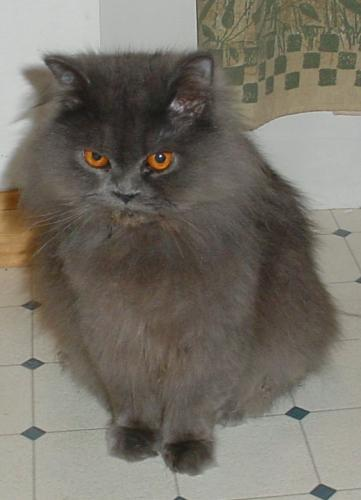

In [30]:
#displaying the training data of cat
img=os.listdir(CAT_TRAIN)

keras.preprocessing.image.load_img(CAT_TRAIN+img[random.randint(0,len(img)-1)])

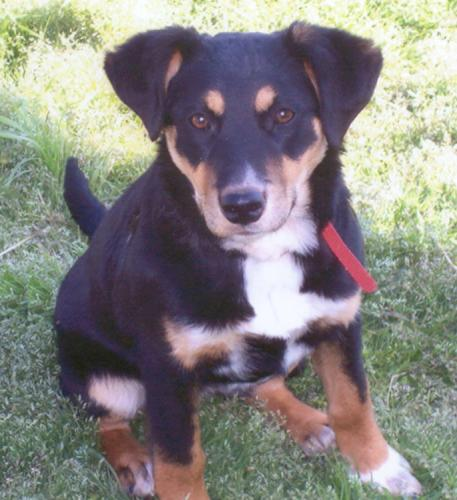

In [31]:
#displaying the training data of dog
img= os.listdir(DOG_TRAIN)

keras.preprocessing.image.load_img(DOG_TRAIN+img[random.randint(0,len(img)-1)])

In [32]:
from tensorflow import keras
model = keras.models.Sequential([

    #First Convolutional Block
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                        input_shape=(256, 256, 3)),   # 32 filters, each 3x3, RGB input
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),   # reduce dimensions by 2x

    #Second Convolutional Block
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # more filters = deeper features
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),

    #Flatten and Dense Layers
    keras.layers.Flatten(),  # flatten feature maps into a 1D vector
    keras.layers.Dense(units=128, activation='relu'),  # fully connected layer with 128 neurons
    keras.layers.Dense(units=1, activation='sigmoid')  # output layer for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer='adam',                  #Adaptive optimizer that works well in practice
    loss='binary_crossentropy',        #Best suited for binary classification
    metrics=['accuracy']               #Evaluate performance using accuracy
)

In [35]:
#CallBacks
#EarlyStopping
early_stop= ES(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    restore_best_weights=True,
    verbose=1,
    mode='auto',
    baseline=None)

#ModelCheckpoint
checkpoint= MCP(
    filepath='best_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True ,
    verbose=1,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
               )

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
track = model.fit(
    train_set,                  #training data generator
    validation_data=test_set,   #testing/validation data generator
    epochs=15,                  #train for 15 epochs
    callbacks=[early_stop, checkpoint]  #use early stopping + checkpointing
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
169/625 ━━━━━━━━━━━━━━━━━━━━ 3:39 482ms/step - accuracy: 0.5619 - loss: 1.4627

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.5986 - loss: 0.9395
Epoch 1: val_loss improved from inf to 0.56830, saving model to best_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 401s 629ms/step - accuracy: 0.5987 - loss: 0.9391 - val_accuracy: 0.7002 - val_loss: 0.5683
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.7062 - loss: 0.5757
Epoch 2: val_loss improved from 0.56830 to 0.51589, saving model to best_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 609ms/step - accuracy: 0.7062 - loss: 0.5756 - val_accuracy: 0.7442 - val_loss: 0.5159
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.7539 - loss: 0.5088
Epoch 3: val_loss improved from 0.51589 to 0.46487, saving model to best_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 383s 614ms/step - accuracy: 0.7539 - loss: 0.5088 - val_accuracy: 0.7796 - val_loss: 0.4649
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.7836 - loss: 0.4577
Epoch 4: val_loss improved fro

In [38]:
print(track.history)

{'accuracy': [0.6337633728981018, 0.7204220294952393, 0.7603260278701782, 0.7853785157203674, 0.7999799847602844, 0.8135813474655151, 0.8245824575424194, 0.834633469581604, 0.8432343006134033, 0.8548355102539062, 0.8668866753578186, 0.8723372220993042, 0.8812881112098694, 0.8896389603614807], 'loss': [0.6886195540428162, 0.5575360655784607, 0.49862074851989746, 0.4553399682044983, 0.43137815594673157, 0.4082827866077423, 0.38575494289398193, 0.3714967668056488, 0.35264965891838074, 0.3297913372516632, 0.3152519762516022, 0.30045178532600403, 0.28323453664779663, 0.269143283367157], 'val_accuracy': [0.7002000212669373, 0.7441999912261963, 0.7796000242233276, 0.8027999997138977, 0.7955999970436096, 0.8027999997138977, 0.8176000118255615, 0.8294000029563904, 0.8356000185012817, 0.8321999907493591, 0.8342000246047974, 0.8417999744415283, 0.8381999731063843, 0.8327999711036682], 'val_loss': [0.5682996511459351, 0.5158921480178833, 0.46486684679985046, 0.4342709481716156, 0.43925365805625916

In [39]:
#Predict probabilities on the test set
predictions_probabilities = model.predict(test_set)

157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 484ms/step


In [40]:
#Convert probabilities -> binary labels
predicted_labels = (predictions_probabilities > 0.5).astype(int).flatten()

In [41]:
#True labels from the generator
true_labels = test_set.classes

In [42]:
true_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [43]:
predicted_labels

array([1, 0, 1, ..., 1, 1, 1])

In [45]:
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1214 1286]
 [1197 1303]]


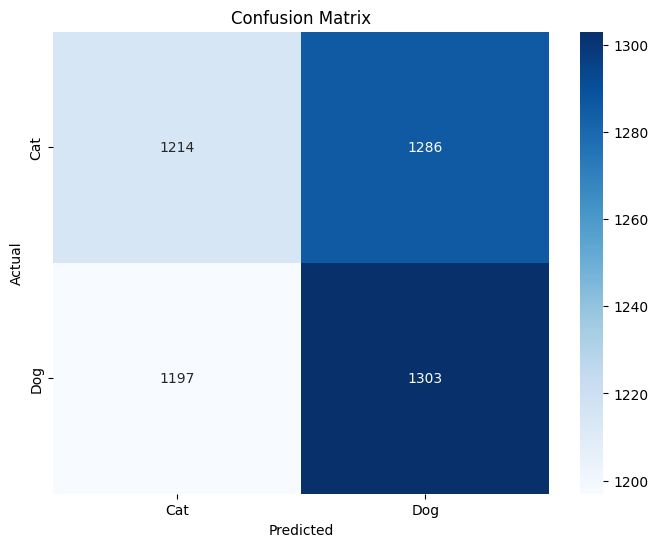

In [46]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Key Components of the Output:

Precision: The model has high precision (0.98-1.0) and recall (0.98-1.0) for all classes, indicating low false positives and false negatives.

Recall: The ratio of true positive predictions to the total actual positives. It measures the model's ability to identify all relevant instances.

F1-Score: The F1-score (harmonic mean of precision and recall) ranges from 0.98 to 0.99, suggesting a good balance between precision and recall.

Support: The support column shows the number of instances for each class in the test set (e.g., 980 instances for class 0, 1135 for class 1, etc.).

The overall accuracy is 0.99, meaning the model correctly classifies 99% of the instances in the test set.

The macro avg and weighted avg rows provide the average metrics across all classes.

In [47]:
report = classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      0.49      0.49      2500
         Dog       0.50      0.52      0.51      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



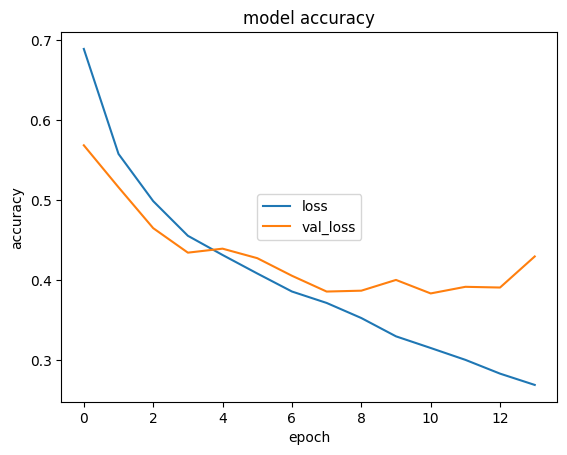

In [48]:
plt.plot(track.history['loss'])
plt.plot(track.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='center')
plt.show()

1. Q.1: **Final Performance**: The model achieved a final training accuracy of 88.9% and a validation accuracy of 83.3% after 15 epochs. The final training loss was 0.27, while the validation loss was 0.43.

2. Q.2: **Confusion Matrix**: The  model is struggling almost equally with cats and dogs, but It misclassified 1286 cats as dogs and it misclassified 1197 dogs as cats. So, the model had slightly more trouble identifying cats than dogs, since more cats were misclassified.

3. Q.3:  **Training Curves**: From the accuracy and loss graphs, the model appears to start overfitting after ~10 epochs. Training for more epochs would not improve validation accuracy; instead, it may make the gap between training and validation performance larger. Early stopping, dropout layers, or more data augmentation would help reduce this overfitting.

4. Q.4: **Potential Improvements**:If I had more time, I would improve the model by adding dropout layers and using stronger data augmentation (rotations, shifts, brightness changes). This would help reduce overfitting and make the model generalize better.

**Q.1**:** Advantages of Convolutional Layers over Fully Connected Layers:**

1. Fully Connected (Dense) layers connect every neuron to every input pixel → huge number of parameters. Convolutional layers use filters that are much smaller than the input → fewer parameters, less computation, easier to train.


2. Conv layers detect local patterns (edges, textures, shapes) regardless of their position in the image. Dense layers treat each pixel independently, losing spatial structure.

3. Conv layers learn hierarchical features (edges → shapes → objects). Dense layers often overfit because they memorize instead of generalizing.


**Q.2**: **Role of Pooling Layers in reducing complexity**

1. Downsample feature maps → reduce height & width while keeping depth (channels).

2. Lower computational complexity → fewer parameters, faster training.

3. Prevent overfitting → smaller representations act as regularization.

4. Maintain important features → especially with MaxPooling, where the strongest activation (most important feature) is kept.

**Q.3:  Comparison of Pooling Layers**
 1. max pooling: Takes the maximum value in each pooling window
 2. Average pooling: Takes the average value in each window
 3. GAP: Takes average across the entire feature map

In [49]:
from IPython.display import Image, display

# Replace this with the URL of the GIF you want to display
gif_url = "https://cardsimages.info-tuparada.com/566/4555-6-congratulations-ecard.gif"

# Display the GIF
display(Image(url=gif_url))